<a href="https://colab.research.google.com/github/farhan-najeeb/iris_classification/blob/main/sc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
colnames=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','Species']

In [3]:
iris=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None,names=colnames)

In [4]:
iris=iris[iris['Species']!='Iris-virginica']
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

In [6]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.094000,2.862000,0.785000
std,0.641698,0.476057,1.448565,0.566288
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


DATA NORMALIZATION

In [7]:
X = preprocessing.scale(iris.drop('Species',axis=1))

ONE HOT ENCODING

In [8]:
Y = pd.get_dummies(iris['Species'])

In [9]:
Y.shape

(100, 2)

TRAINING

In [10]:


#training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
epoch = 20

#model
model = Sequential()
model.add(Dense(6, input_dim=4, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

#fitting the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epoch, batch_size=1)

Epoch 1/20
80/80 [==============================] - 0s 3ms/step - loss: 1.0150 - accuracy: 0.4375 - val_loss: 0.7739 - val_accuracy: 0.6000
Epoch 2/20
80/80 [==============================] - 0s 1ms/step - loss: 0.7656 - accuracy: 0.6375 - val_loss: 0.5489 - val_accuracy: 0.7000
Epoch 3/20
80/80 [==============================] - 0s 1ms/step - loss: 0.5410 - accuracy: 0.7125 - val_loss: 0.3632 - val_accuracy: 0.8500
Epoch 4/20
80/80 [==============================] - 0s 1ms/step - loss: 0.3499 - accuracy: 0.8750 - val_loss: 0.2196 - val_accuracy: 0.9500
Epoch 5/20
80/80 [==============================] - 0s 1ms/step - loss: 0.2024 - accuracy: 1.0000 - val_loss: 0.1269 - val_accuracy: 0.9500
Epoch 6/20
80/80 [==============================] - 0s 1ms/step - loss: 0.1060 - accuracy: 1.0000 - val_loss: 0.0706 - val_accuracy: 1.0000
Epoch 7/20
80/80 [==============================] - 0s 1ms/step - loss: 0.0506 - accuracy: 1.0000 - val_loss: 0.0392 - val_accuracy: 1.0000
Epoch 8/20
80/80 [==

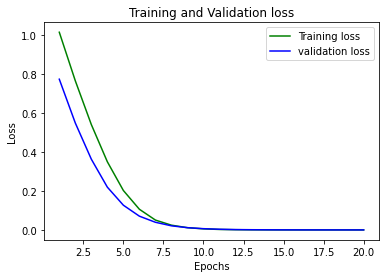

In [11]:
import matplotlib.pyplot as plt

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epoch +1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

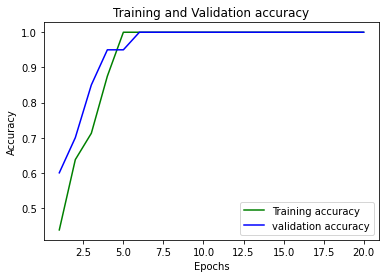

In [12]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,(epoch +1))
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
#function to get prediction as species names
def get_prediction(X):
  y_pred=np.argmax(model.predict(X),axis=1)
  Y_pred=['setosa' if x == 0 else 'versicolor' for x in y_pred ]
  return(Y_pred)

#function to get target value as species names
def get_target(Y):
  y_test=(np.argmax(Y,axis=1))
  Y_target=['setosa' if x == 0 else 'versicolor' for x in y_test ]
  return(Y_target)


In [17]:
y_pred=get_prediction(X_test[:5])

In [18]:
y_test=get_target(Y_test[:5].values)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         2
  versicolor       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



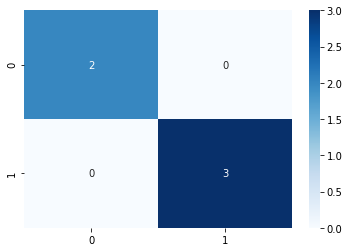

In [22]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,cmap='Blues')